#                                Supermarket Sales Data Analysis

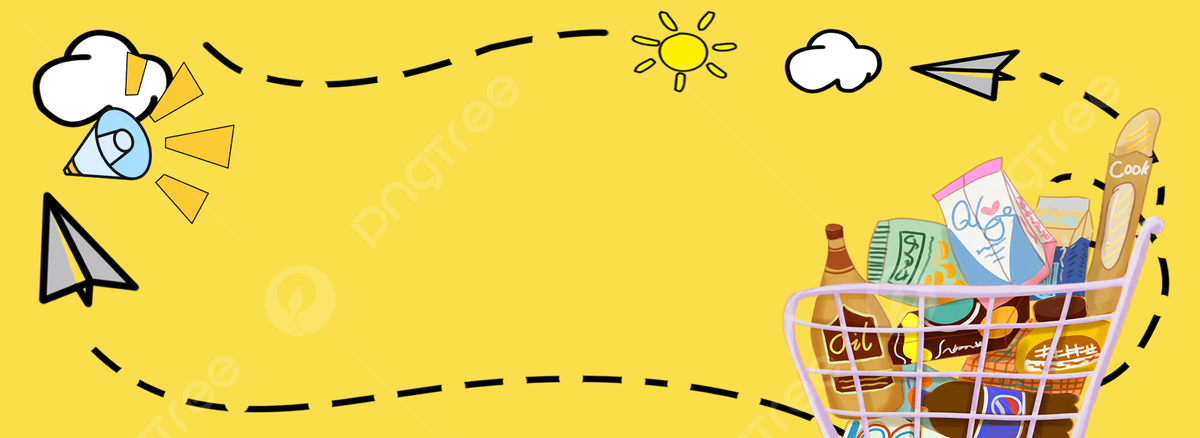

## Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

### Reading the data using pandas
Reference:  https://drive.google.com/file/d/1sgsX_WDBnOYsLMVMNvr6_hlV5cppmlfJ/view?usp=sharing

In [ ]:
df = pd.read_csv('/content/supermarket_sales.csv')
df.head(5)

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


## Exploratory Data Analysis - Basic information about the data

### 1. Understanding shape of the data

In [ ]:
df.shape

(1000, 20)

### 2. Describing the data

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
count,1000.000000,1000.000000,896.000000,1000.000000,1000.000000,1000.000000,1000.000000,857.000000,1000.000000,1000.000000
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,0.000000,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905,874.980000,10.000000,96.173500,21.958800


### 3. Info about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

### 4. Finding number of null values in data and sorting in decreasing

In [ ]:
df.isnull().sum().sort_values(ascending= False)


Branch                     194
Rating                     143
Tax 5%                     104
Customer type               48
Gender                      25
Product line                23
Payment                     21
Invoice ID                   0
Longitude                    0
gross income                 0
gross margin percentage      0
cogs                         0
Total                        0
Time                         0
Date                         0
Quantity                     0
Unit price                   0
City                         0
CustomerID                   0
Latitude                     0
dtype: int64

### Reading Data Dictionary


In [ ]:
data_dict = pd.read_csv('/content/data_dict.csv')
data_dict

,Field,Description
0,Invoice ID,Invoice ID of the transaction
1,Branch,One out of 3 branches. Every city belongs to a...
2,CustomerID,Customer ID of the cutomer doing transaction
3,City,City where the tx took place. The chain has st...
4,Customer Type,Where a member or normal customer
5,Gender,Male or Female
6,Product Line,Product line of the product purchased
7,Unit Price,Unit price of product purchased
8,Quantity,Qty purchased
9,Tax 5%,Tax as a fixed % of invoice


# Data Wrangling

A sneak peak in quantitative field using style function

In [ ]:
df.head(20).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.690000,10,37.345000,746.900000,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.173500,16.840900
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.280000,6,4.584000,91.680000,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.078500,19.763300
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.330000,7,16.215500,324.310000,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.173500,16.840900
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.220000,11,32.021000,640.420000,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.173500,16.840900
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.310000,7,30.208500,604.170000,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,nan,96.173500,16.840900
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.390000,8,34.156000,683.120000,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,nan,96.078500,19.763300
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.840000,6,20.652000,413.040000,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,nan,96.173500,16.840900
7,315-22-5665,C,C1471,Naypyitaw,nan,Female,Health and beauty,73.560000,12,44.136000,882.720000,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,nan,96.078500,19.763300
8,665-32-9167,A,C1707,Yangon,nan,Female,Health and beauty,36.260000,2,3.626000,72.520000,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,nan,96.173500,16.840900
9,692-92-5582,B,C1277,Mandalay,nan,Female,Health and beauty,54.840000,4,10.968000,219.360000,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,nan,96.089100,21.958800


Revealing details on describe() data using style function

In [ ]:
df.describe().style.background_gradient(cmap = 'GnBu')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
count,1000.000000,1000.000000,896.000000,1000.000000,1000.000000,1000.000000,1000.000000,857.000000,1000.000000,1000.000000
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,0.000000,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905,874.980000,10.000000,96.173500,21.958800


### Finding percentage of null values in the data

In [ ]:
null_perc = df.isnull().sum()/len(df)*100
null_perc

Invoice ID                  0.0
Branch                     19.4
CustomerID                  0.0
City                        0.0
Customer type               4.8
Gender                      2.5
Product line                2.3
Unit price                  0.0
Quantity                    0.0
Tax 5%                     10.4
Total                       0.0
Date                        0.0
Time                        0.0
Payment                     2.1
cogs                        0.0
gross margin percentage     0.0
gross income                0.0
Rating                     14.3
Longitude                   0.0
Latitude                    0.0
dtype: float64

### Sorting the percent values to get decreasing order view

In [ ]:
null_perc.sort_values(ascending = False)

Branch                     19.4
Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Invoice ID                  0.0
Longitude                   0.0
gross income                0.0
gross margin percentage     0.0
cogs                        0.0
Total                       0.0
Time                        0.0
Date                        0.0
Quantity                    0.0
Unit price                  0.0
City                        0.0
CustomerID                  0.0
Latitude                    0.0
dtype: float64

## Data Imputation

Before moving further first copy the data

In [ ]:
df1 = df.copy()

Find the mean Rating. 
The Rating column has 14.3% of null values. 
 

In [ ]:
df1.Rating.mean()

7.462625437572928

Imputing null values with mean of Rating. 

In [ ]:
df1['Rating'] = df1['Rating'].fillna(df1.Rating.mean())
df1.head(10)

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,7.462625,96.1735,16.8409
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.39,8,34.1560,683.12,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,7.462625,96.0785,19.7633
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.84,6,20.6520,413.04,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,7.462625,96.1735,16.8409
7,315-22-5665,C,C1471,Naypyitaw,NaN,Female,Health and beauty,73.56,12,44.1360,882.72,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,7.462625,96.0785,19.7633
8,665-32-9167,A,C1707,Yangon,NaN,Female,Health and beauty,36.26,2,3.6260,72.52,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,7.462625,96.1735,16.8409
9,692-92-5582,B,C1277,Mandalay,NaN,Female,Health and beauty,54.84,4,10.9680,219.36,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,7.462625,96.0891,21.9588


Finding mean value of Tax 5%. Tax 5% column has 10.4% null values.

In [ ]:
df1['Tax 5%'].mean()
#df1['Tax 5%'].describe()

20.966930245535714

Imputing null values with mean 'Tax 5%'

In [ ]:
tax_perc = df1['Tax 5%']*100/df1['Total']
tax_perc.head(20)
df1['Tax 5%'] = df1['Tax 5%'].fillna(df1['Tax 5%'].mean())
tax_perc.head(20)

0      5.000000
1      5.000000
2      5.000000
3      5.000000
4      5.000000
5      5.000000
6      5.000000
7      5.000000
8      5.000000
9      5.000000
10     5.000000
11    13.698504
12     8.931600
13     4.854580
14     2.937368
15     2.033808
16     3.041771
17     4.812682
18    12.783934
19    17.342374
dtype: float64

There are other qualitative columns having null values so we have made a function to impute the null values. 

In [ ]:
def impute_mode(col):
    print("The mode of this field is :  " + df1[col].mode()[0])
    df1[col] =  df1[col].fillna(df1[col].mode()[0])
    print("Mode value imputed")


Imputing null values in Column 'Payment'

In [ ]:
impute_mode('Payment')

The mode of this field is :  Ewallet
Mode value imputed


Imputing null values in Column 'Customer type'

In [ ]:
impute_mode('Customer type')

The mode of this field is :  Normal
Mode value imputed


imputing null values in Column 'Product line'

In [ ]:
impute_mode('Product line')

The mode of this field is :  Health and beauty
Mode value imputed


Imputing null values in Column 'Gender'

In [ ]:
impute_mode('Gender')

The mode of this field is :  Female
Mode value imputed


Finding Unique values for imputating the null values

In [ ]:
df1[['Branch', 'City']].drop_duplicates()

,Branch,City
0,A,Yangon
1,C,Naypyitaw
9,B,Mandalay
178,NaN,Yangon
179,NaN,Naypyitaw
185,NaN,Mandalay


Column 'Branch' has 19.4% of null values. For imputing the Branch code city wise, we need to write a function.

In [ ]:
for i in range(len(df1['Branch'])):
  if pd.isna(df1['Branch'][i]) == True:
    if (df1['City'][i].strip()=="Yangon"):
      df1['Branch'][i]=='A'
      print('NA imputed as branch A')
    elif df1['City'][i].strip()=='Naypyitaw':
      df1['Branch'][i]=='C'
      print('NA imputed as branch C')
    elif df1['City'][i].strip()=='Mandalay':
      df1['Branch'][i]=='B'
      print('NA imputed as branch B')
    else:
      print('City not available')


NA imputed as branch A
NA imputed as branch C
NA imputed as branch C
NA imputed as branch C
NA imputed as branch A
NA imputed as branch C
NA imputed as branch A
NA imputed as branch B
NA imputed as branch B
NA imputed as branch B
NA imputed as branch B
NA imputed as branch C
NA imputed as branch C
NA imputed as branch A
NA imputed as branch A
NA imputed as branch B
NA imputed as branch A
NA imputed as branch A
NA imputed as branch C
NA imputed as branch C
NA imputed as branch B
NA imputed as branch C
NA imputed as branch A
NA imputed as branch B
NA imputed as branch C
NA imputed as branch B
NA imputed as branch C
NA imputed as branch C
NA imputed as branch B
NA imputed as branch B
NA imputed as branch A
NA imputed as branch C
NA imputed as branch C
NA imputed as branch A
NA imputed as branch C
NA imputed as branch C
NA imputed as branch C
NA imputed as branch A
NA imputed as branch C
NA imputed as branch A
NA imputed as branch B
NA imputed as branch B
NA imputed as branch C
NA imputed 

Verifying null% after imputations

In [ ]:
null_perc = df1.isnull().sum()/len(df1)*100
null_perc.sort_values(ascending = False)

Branch                     19.4
Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Invoice ID                  0.0
Longitude                   0.0
gross income                0.0
gross margin percentage     0.0
cogs                        0.0
Total                       0.0
Time                        0.0
Date                        0.0
Quantity                    0.0
Unit price                  0.0
City                        0.0
CustomerID                  0.0
Latitude                    0.0
dtype: float64

All null values have been imputed now we will finally check for the null values of the data

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

## Time Series Analysis

Converting date column into date time

In [ ]:
df1.Date = pd.to_datetime(df1.Date)
df1.Date

0     2019-02-21
1     2019-05-27
2     2019-12-27
3     2019-11-15
4     2019-03-31
         ...    
995   2019-02-10
996   2019-12-29
997   2019-01-16
998   2019-03-21
999   2019-11-10
Name: Date, Length: 1000, dtype: datetime64[ns]

For further data wrangling we will add some more columns 

In [ ]:
#adding month, day, weekday columns
df1['month'] = df1.Date.dt.month
df1['day'] = df1.Date.dt.day
df1['weekday'] = df1.Date.dt.day_name()

#adding hours, minute columns
df1['hour'] = df1.Time.str[0:2]
df1['minute']= df1.Time.str[3:5]


df1['hour'] = pd.to_numeric(df1['hour'])
df1['minute']=pd.to_numeric(df1['minute'])

df1[['month', 'day', 'weekday', 'hour', 'minute']]

,month,day,weekday,hour,minute
0,2,21,Thursday,13,8
1,5,27,Monday,10,29
2,12,27,Friday,13,23
3,11,15,Friday,20,33
4,3,31,Sunday,10,37
...,...,...,...,...,...
995,2,10,Sunday,13,46
996,12,29,Sunday,17,16
997,1,16,Wednesday,13,22
998,3,21,Thursday,15,33


Univariate Analysis (Quantitative)

Here we shall use Violin plot and stripplot for visualization
for that purpose we have defined a function. 

In [ ]:
# Defining function for Univariate Analysis of Quantitative Variables

def univariate_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=1,figsize=(20,12))        # Defining 2 subplots, changing fig size
    axes[1].set_title( "Boxenplot of "+ col , size =14)             # Chart title for Subplot 1
    sns.stripplot(df1[col],ax=axes[1], color="#4CB391")             # Distplot in subplot 1


    axes[0].set_title("Violinplot for  " + col )                    #  Title for Subplot 2
    sns.violinplot(df1[col],ax=axes[0], color="grey")               # Violinplot in Subplot 2
    
                      
    plt.tight_layout()
    fig.savefig("univariate_"+col+".png")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


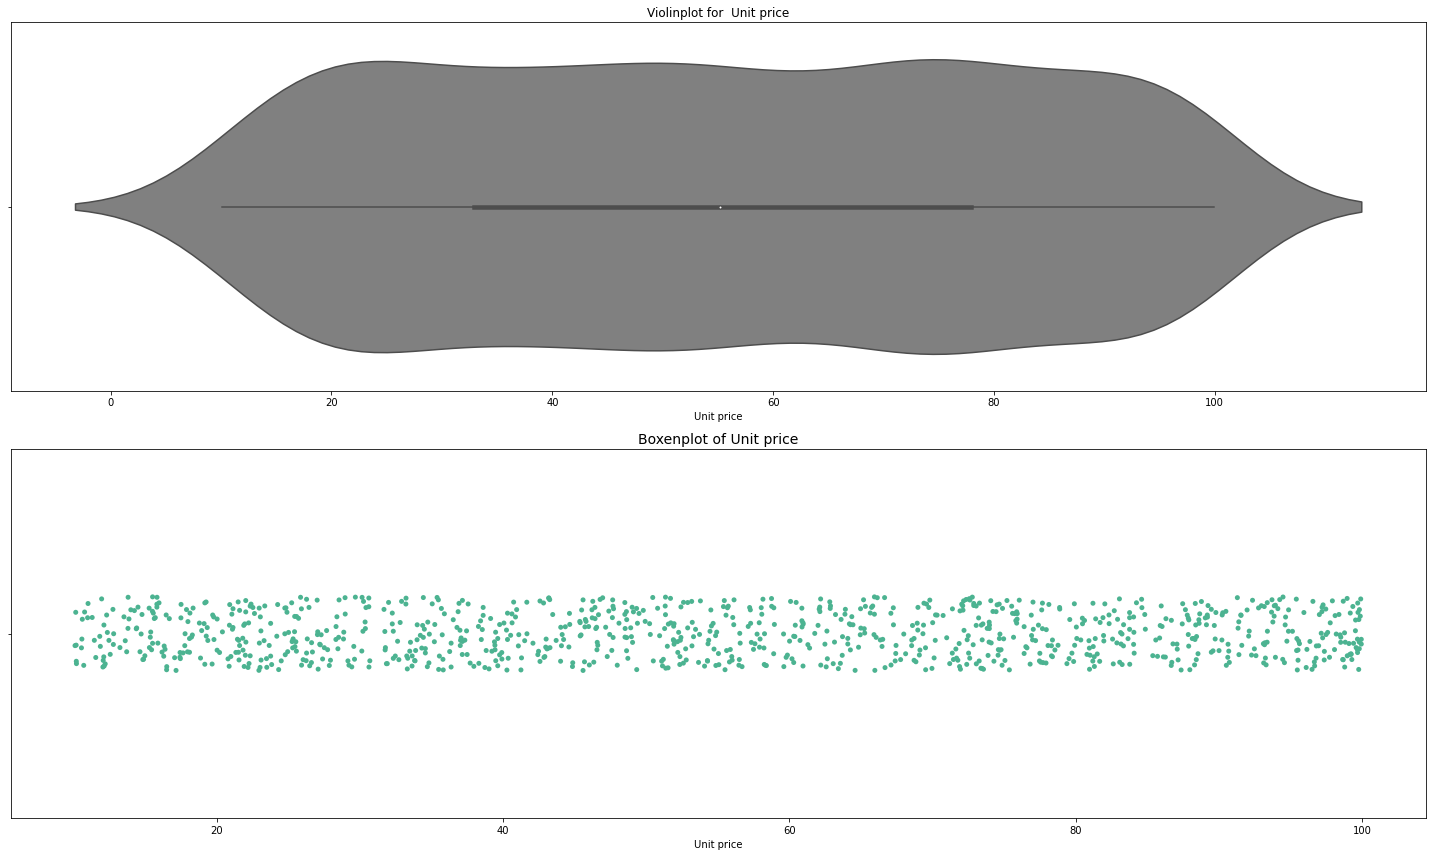

In [ ]:
univariate_quant('Unit price')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


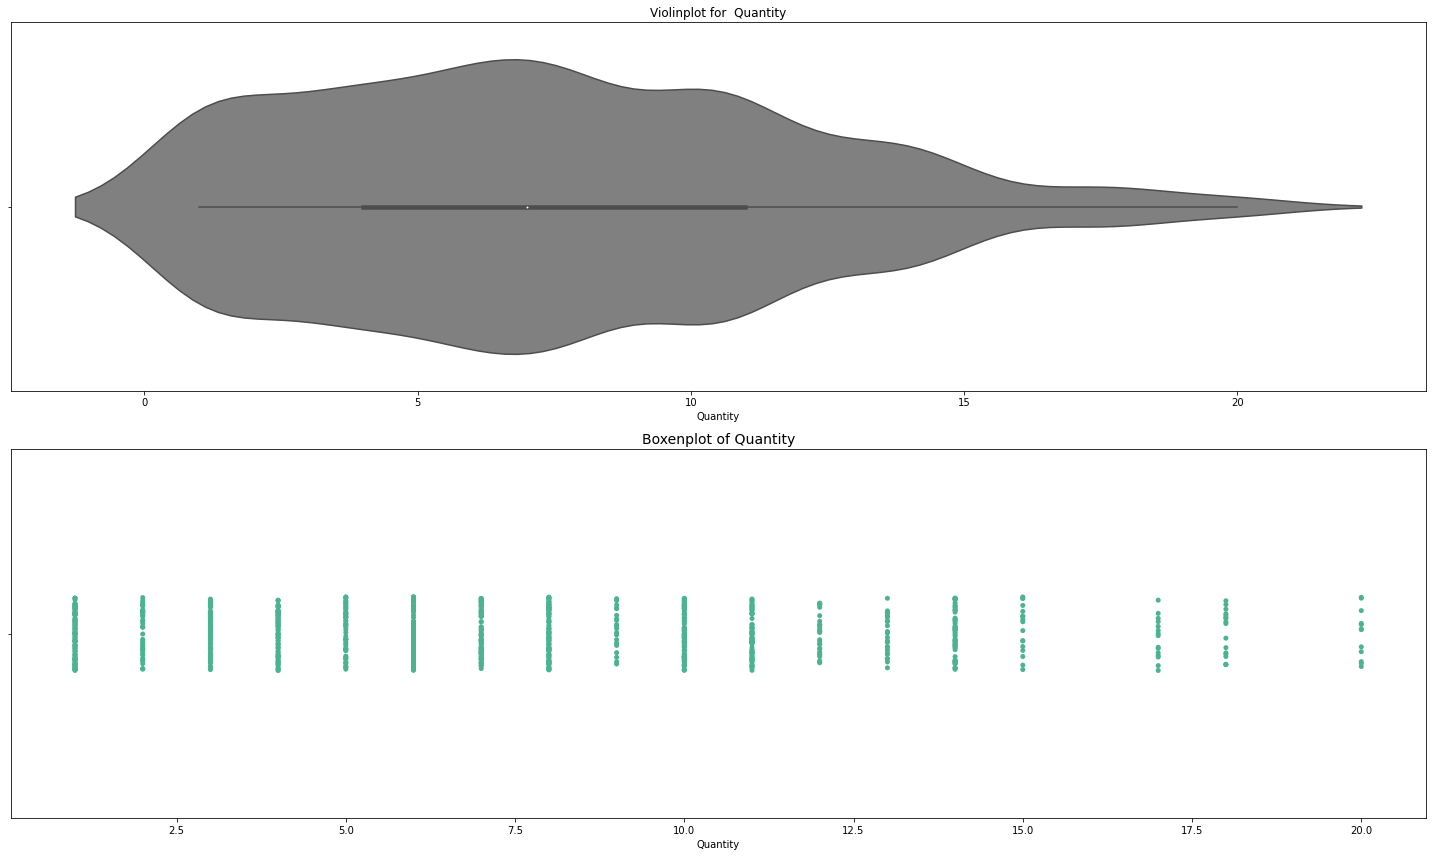

In [ ]:
univariate_quant('Quantity')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


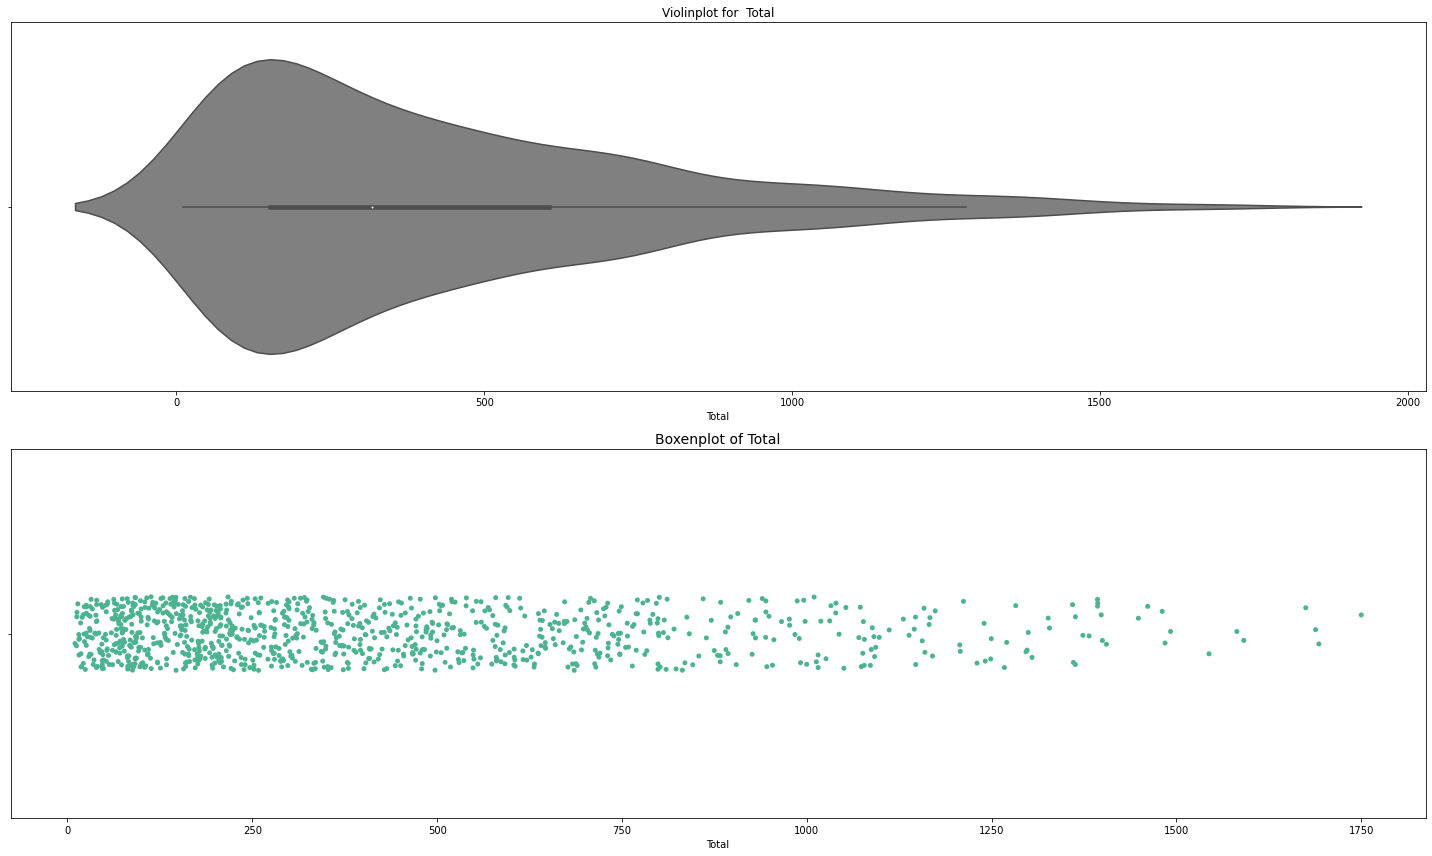

In [ ]:
univariate_quant('Total')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


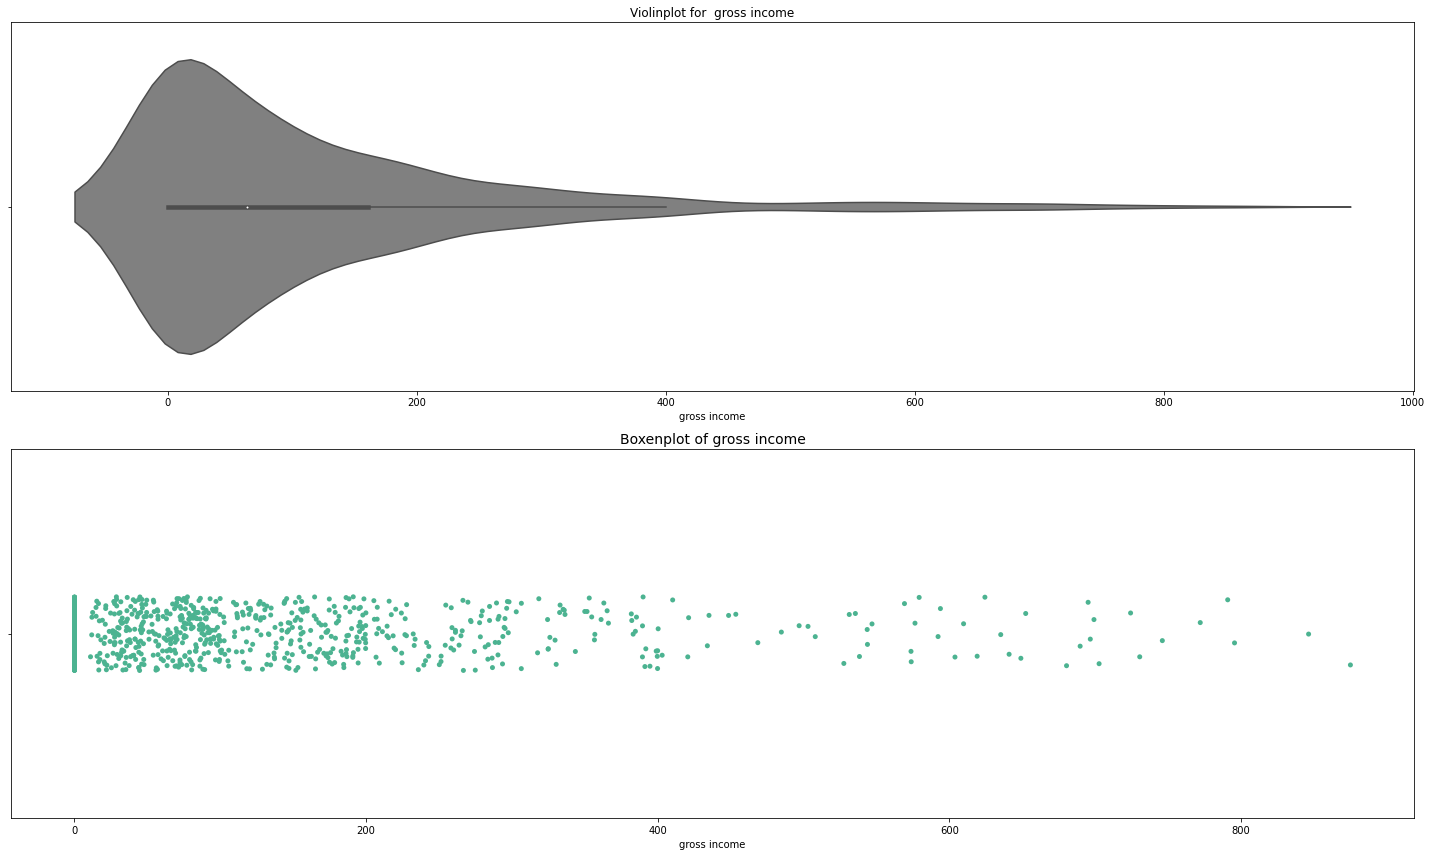

In [ ]:
univariate_quant('gross income')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


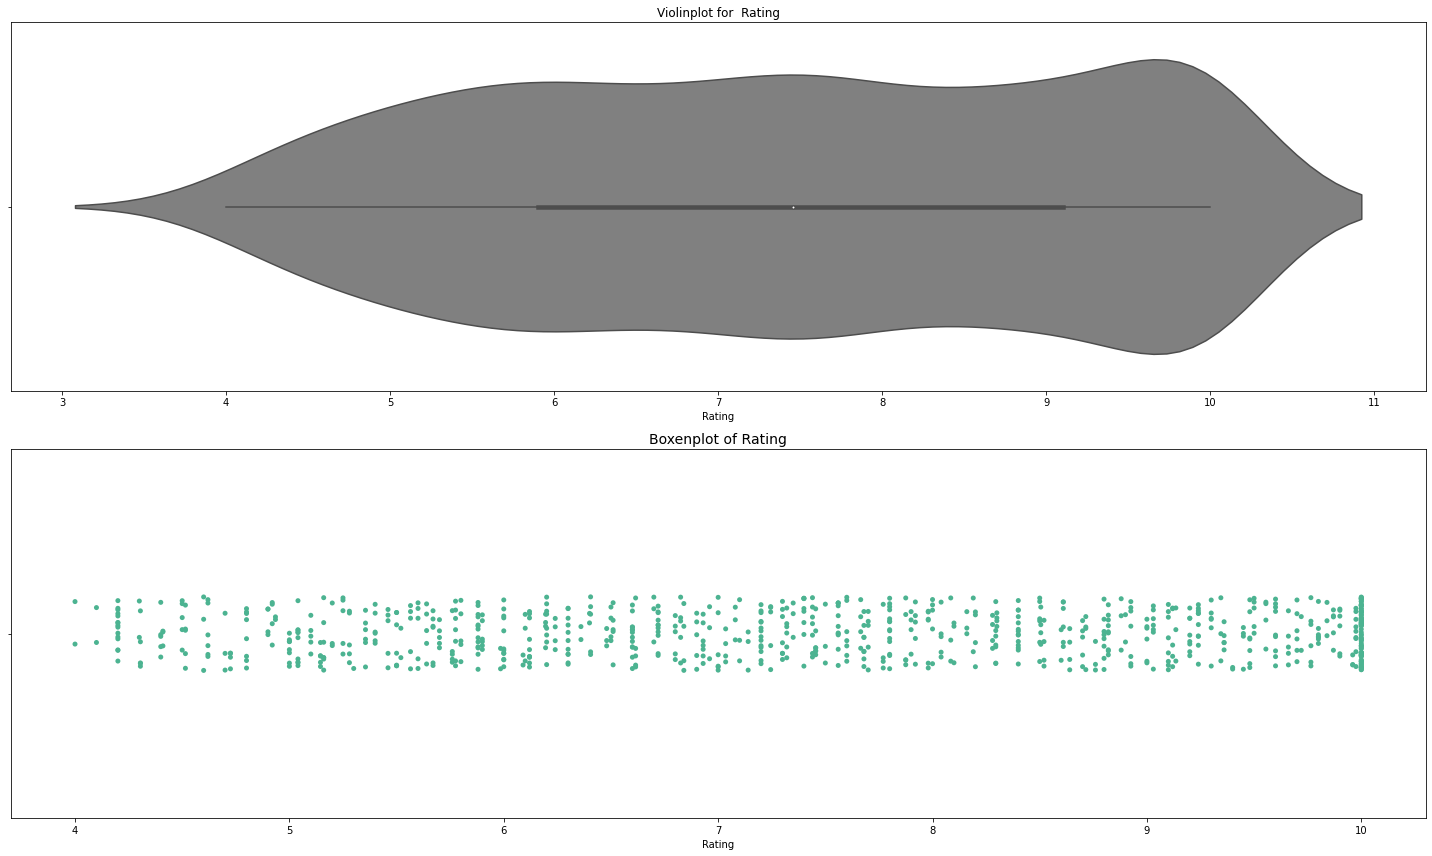

In [ ]:
univariate_quant('Rating')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


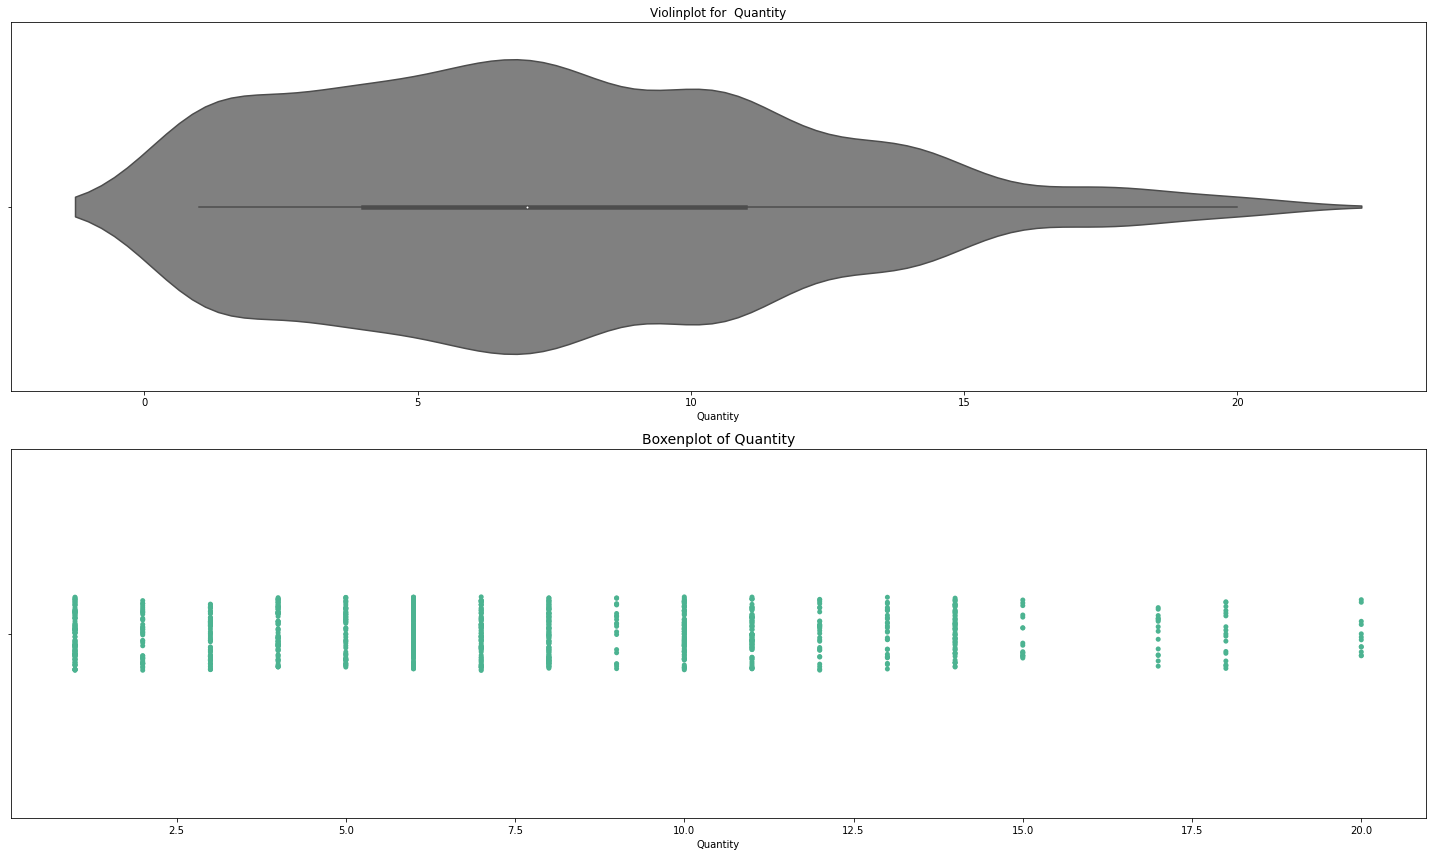

In [ ]:
univariate_quant('Quantity')

### Univariate Analysis (Qualitative)

Across City

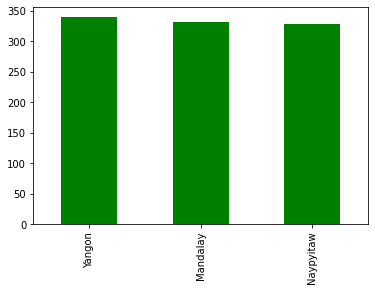

In [ ]:
df1['City'].value_counts().head(10).plot.bar(color='g')

Payment

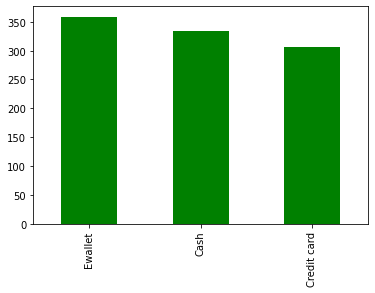

In [ ]:
df1['Payment'].value_counts().head(10).plot.bar(color = 'g')

Gender

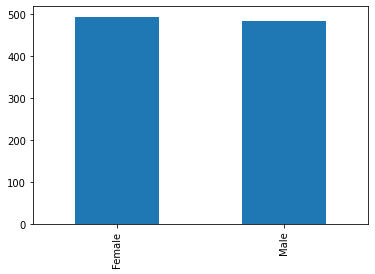

In [ ]:
df1['Gender'].value_counts().head(10).plot.bar()

Product Line

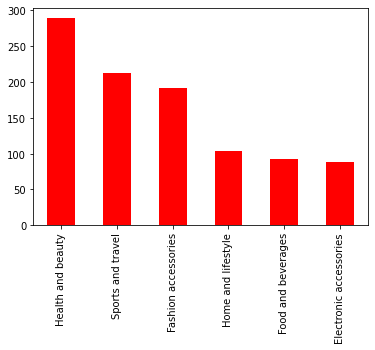

In [ ]:
df1['Product line'].value_counts().head(10).plot.bar(color = 'r')

Customer_members

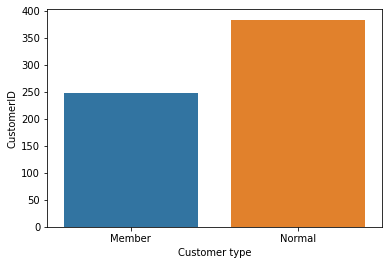

In [ ]:
customer_members = df1[['CustomerID','Customer type']].groupby(['Customer type'], as_index = False).nunique()
customer_members

_=sns.barplot(x=customer_members["Customer type"], y='CustomerID',data=customer_members)

Geographical Location

In [ ]:
cities_geo = df1[['City', 'Longitude', 'Latitude']].drop_duplicates()
cities_geo

,City,Longitude,Latitude
0,Yangon,96.1735,16.8409
1,Naypyitaw,96.0785,19.7633
9,Mandalay,96.0891,21.9588


We shall define a function for location cities on map using Latitude and Longitude

In [ ]:
geo_map = folium.Map(location =[16.8409,96.1735], zoom_start = 5, tiles = 'CartoDB Positron', control_scale = True)

for (i, j) in cities_geo.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['City'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(geo_map)


# Bivariate Analysis

Heatmap.
The purpose of Heatmap here is to look for any significant correlations among continuous variables in our data.

In [ ]:
heatmap_data = df1.corr()
heatmap_data

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,month,year,day,hour,minute
Unit price,1.000000,0.020421,0.583847,0.587456,0.633866,NaN,0.373541,-0.021008,-0.025503,0.015714,-0.005059,NaN,0.022648,0.008242,-0.006869
Quantity,0.020421,1.000000,0.746627,0.745821,0.651471,NaN,0.715042,0.012128,-0.181683,0.224890,0.023197,NaN,-0.010314,0.003728,0.012336
Tax 5%,0.583847,0.746627,1.000000,1.000000,0.942745,NaN,0.855899,-0.025837,-0.154854,0.169364,0.008221,NaN,-0.001933,0.008281,0.000086
Total,0.587456,0.745821,1.000000,1.000000,0.942327,NaN,0.850590,-0.019238,-0.154348,0.173671,0.010050,NaN,0.010679,0.010177,-0.010294
cogs,0.633866,0.651471,0.942745,0.942327,1.000000,NaN,0.625543,-0.040675,-0.032557,0.014986,0.006236,NaN,0.017777,-0.003250,-0.028504
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.373541,0.715042,0.855899,0.850590,0.625543,NaN,1.000000,0.019059,-0.308645,0.381293,0.013629,NaN,-0.003034,0.028828,0.020787
Rating,-0.021008,0.012128,-0.025837,-0.019238,-0.040675,NaN,0.019059,1.000000,-0.129504,0.174698,-0.001487,NaN,-0.051522,-0.006424,0.053077
Longitude,-0.025503,-0.181683,-0.154854,-0.154348,-0.032557,NaN,-0.308645,-0.129504,1.000000,-0.858559,-0.005958,NaN,-0.027279,-0.051414,-0.057099
Latitude,0.015714,0.224890,0.169364,0.173671,0.014986,NaN,0.381293,0.174698,-0.858559,1.000000,-0.015140,NaN,0.025972,0.061723,0.066378


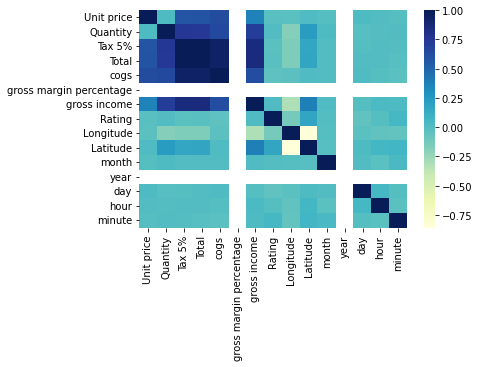

In [ ]:
_=sns.heatmap(heatmap_data, cmap= 'YlGnBu')

Defining function for Bivariate Analysis of Quantitative Variables

In [ ]:
# Defining function for Univariate Analysis of Quantitative Variables

def grouped_analysis(col,hue=None):
    
    plt.figure(figsize=(20,10))
    
    def custom_fmt(x):                                                     # Custom format function to show values in pie chart
        return '{:.0f}%\n({:.0f})'.format(x, sales_grouped['Total'].sum()*x/100)  # It is used in autopct parameter in pie chart

    
    sales_grouped= df1[[col,'Total']].groupby(col).sum()                # Sales grouped by col
    mean_ratings = df1[[col,'Rating']].groupby(col).mean()              # Avg ratings grouped by col
    aov  = df1[[col,'Total']].groupby(col).mean()                       # AOV by col
    mean_units_qty = df1[[col,'Quantity']].groupby(col).mean()          # Mean order qty by col

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
    axes[0,0].set_title("Sales by " + col , size = 25)                            # Chart title for Subplot 1
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)
   
    _=axes[0,0].pie(sales_grouped['Total'], labels = sales_grouped.index, autopct= custom_fmt,textprops={'fontsize': 14})


    axes[0,1].set_title("AOV by "  + col,size = 25 )                              #  Title for Subplot 2
    axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)    
    axes[0,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[0,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    g=sns.barplot(x=aov.index, y='Total', color="#f7a516",data=aov,ax=axes[0,1]) 
    g.set_xticklabels(
    labels=aov.index, rotation=45)                                                # Rotating lables so that they dont overlap
    
    
    axes[1,0].set_title("Mean Ratings by " + col,size = 25 )                      # Title for Subplot 3
    axes[1,0].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,0].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_ratings.index, x='Rating', color="#305cb0",data=mean_ratings,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Mean Units Qty by " + col,size = 25 )                    # Title for Subplot 4
    axes[1,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_units_qty.index, x='Quantity', color="#712f80",data=mean_units_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()
    fig.savefig("grouped_analysis"+col+".png")

Across City

<Figure size 1440x720 with 0 Axes>

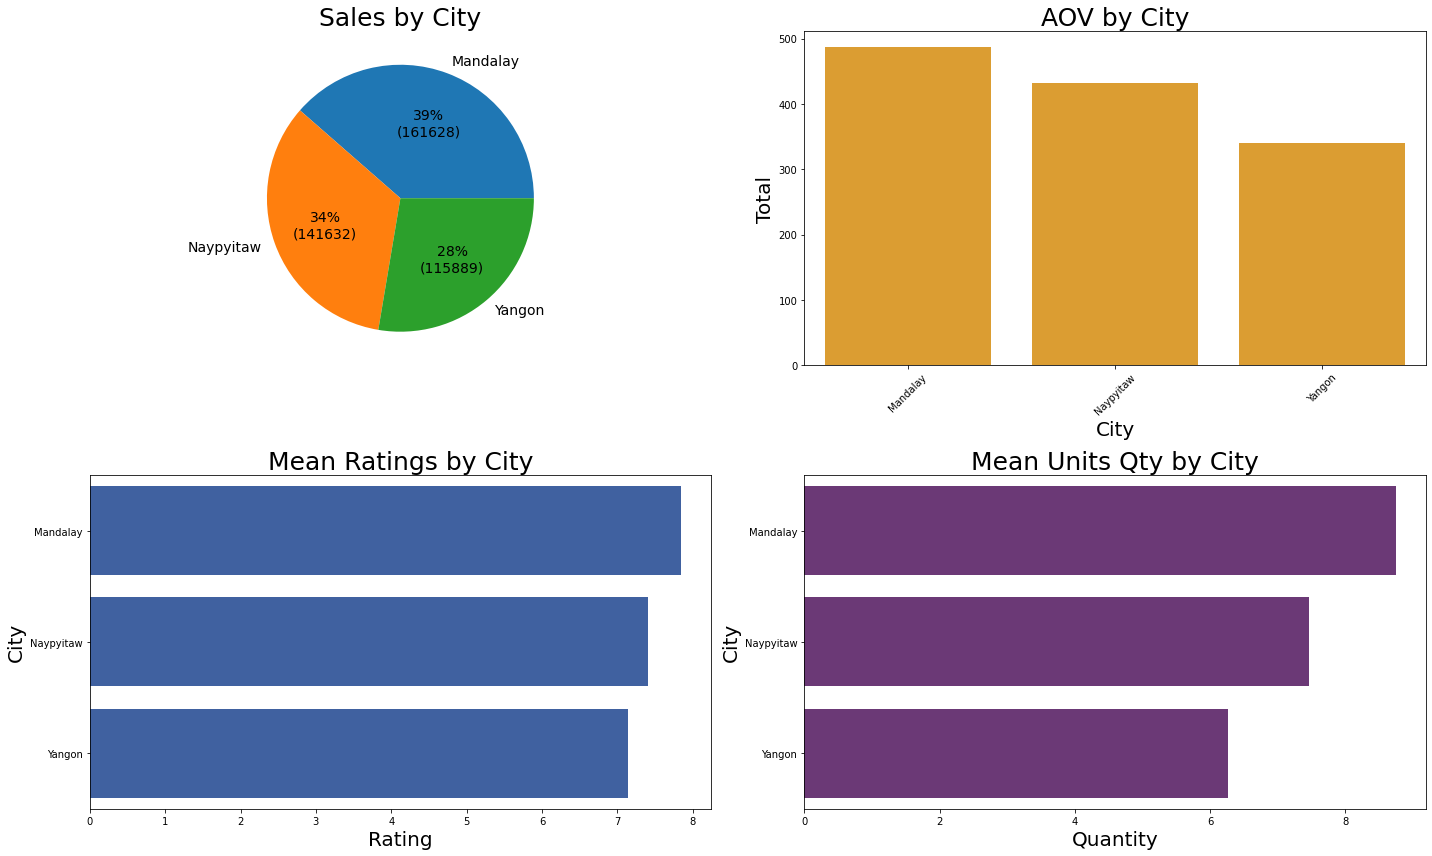

In [ ]:
grouped_analysis('City')

Customer Type

<Figure size 1440x720 with 0 Axes>

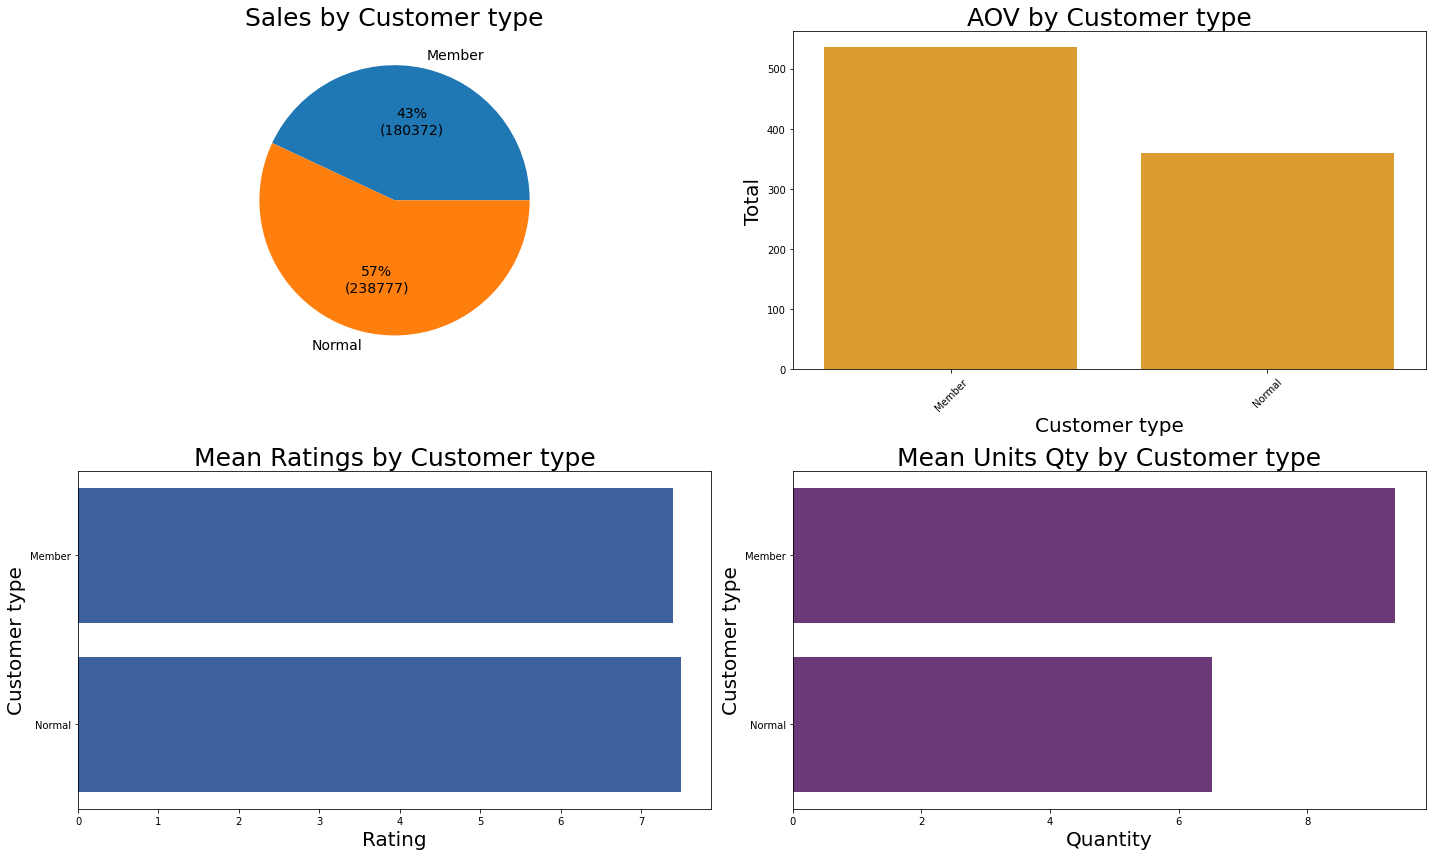

In [ ]:
grouped_analysis('Customer type')

Gender

<Figure size 1440x720 with 0 Axes>

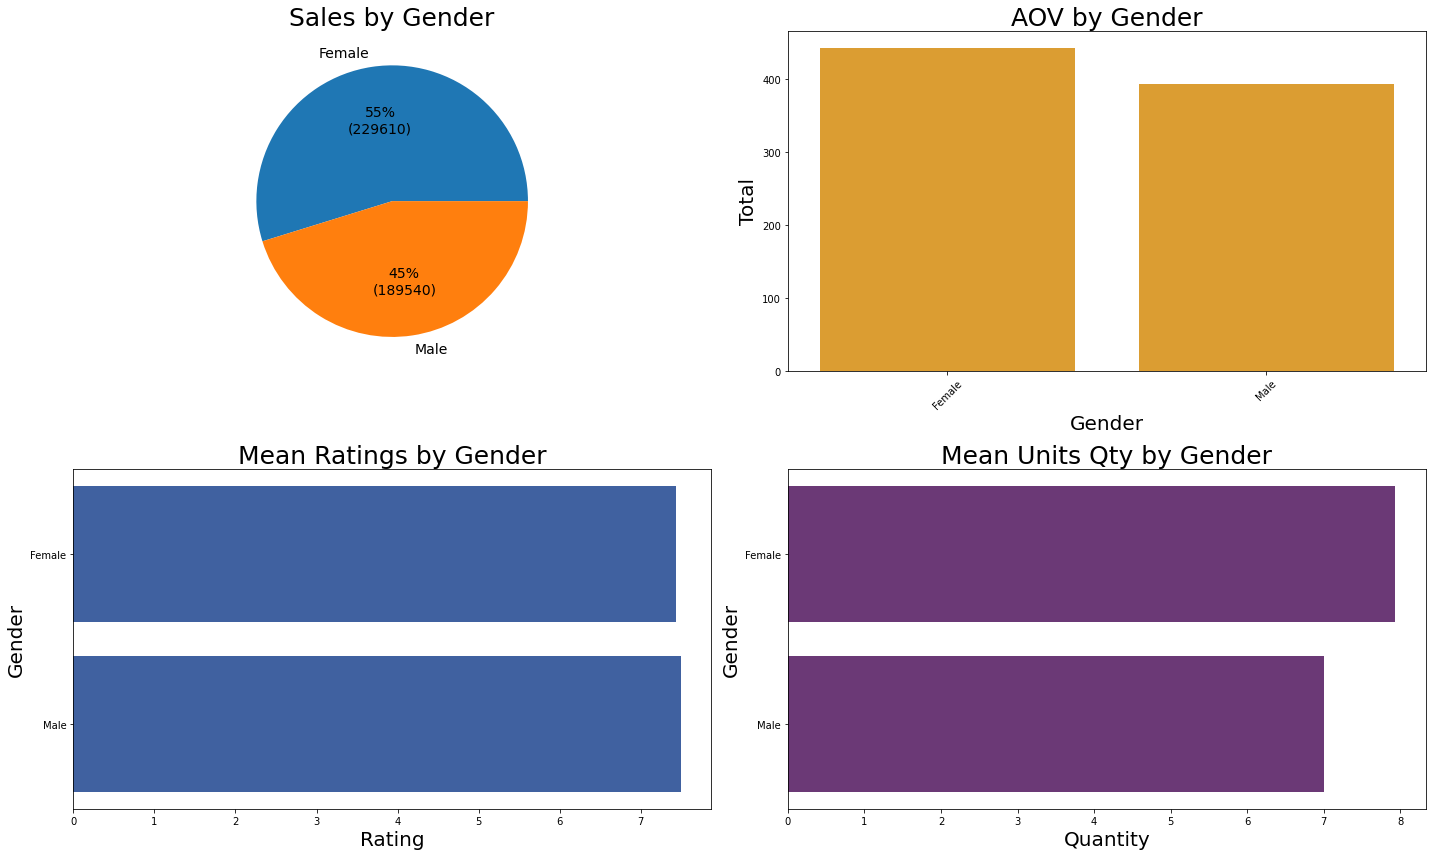

In [ ]:
grouped_analysis('Gender')

Product Line

<Figure size 1440x720 with 0 Axes>

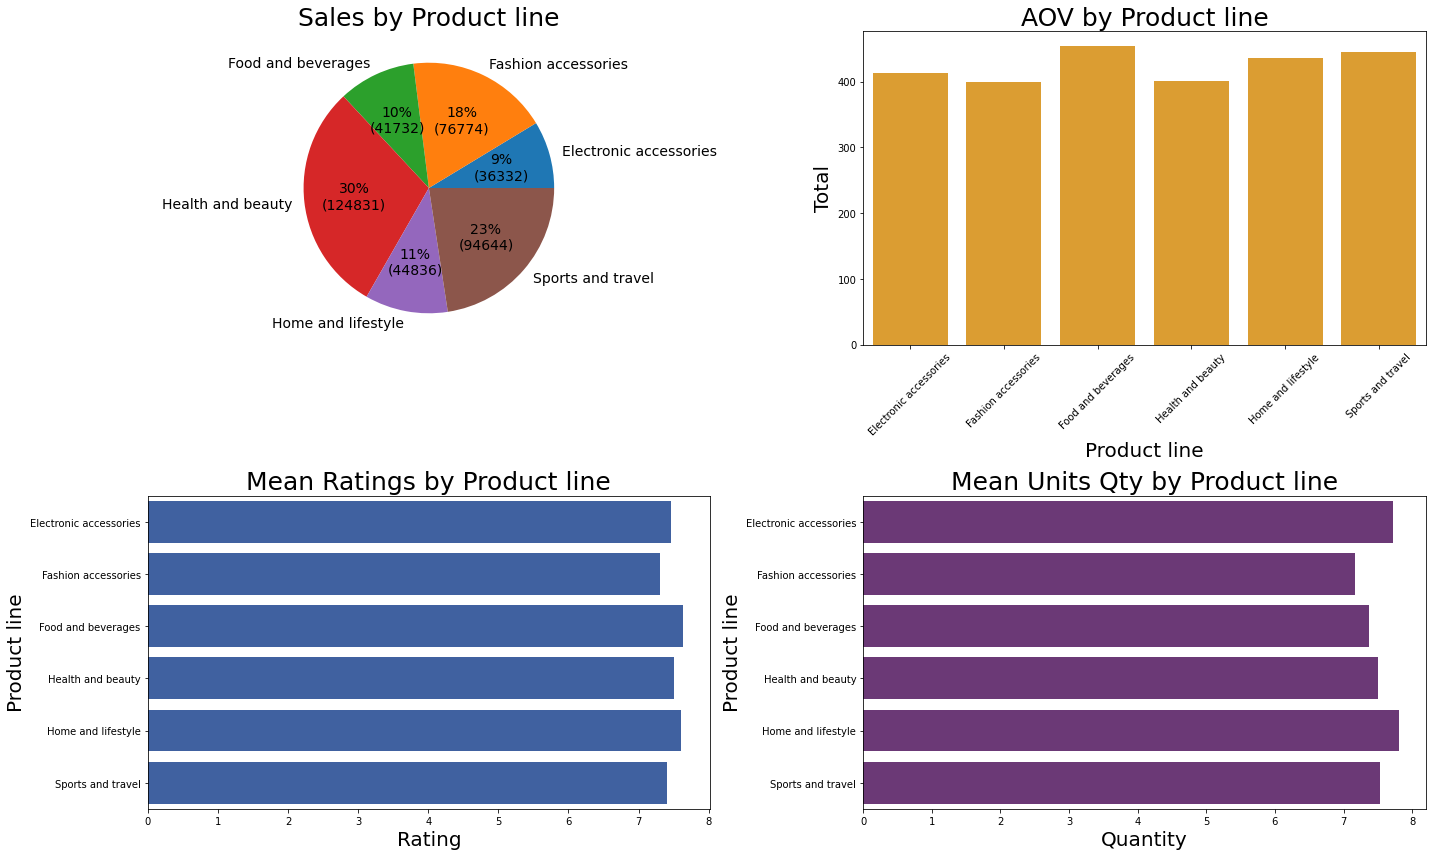

In [ ]:
grouped_analysis('Product line')

Payment

<Figure size 1440x720 with 0 Axes>

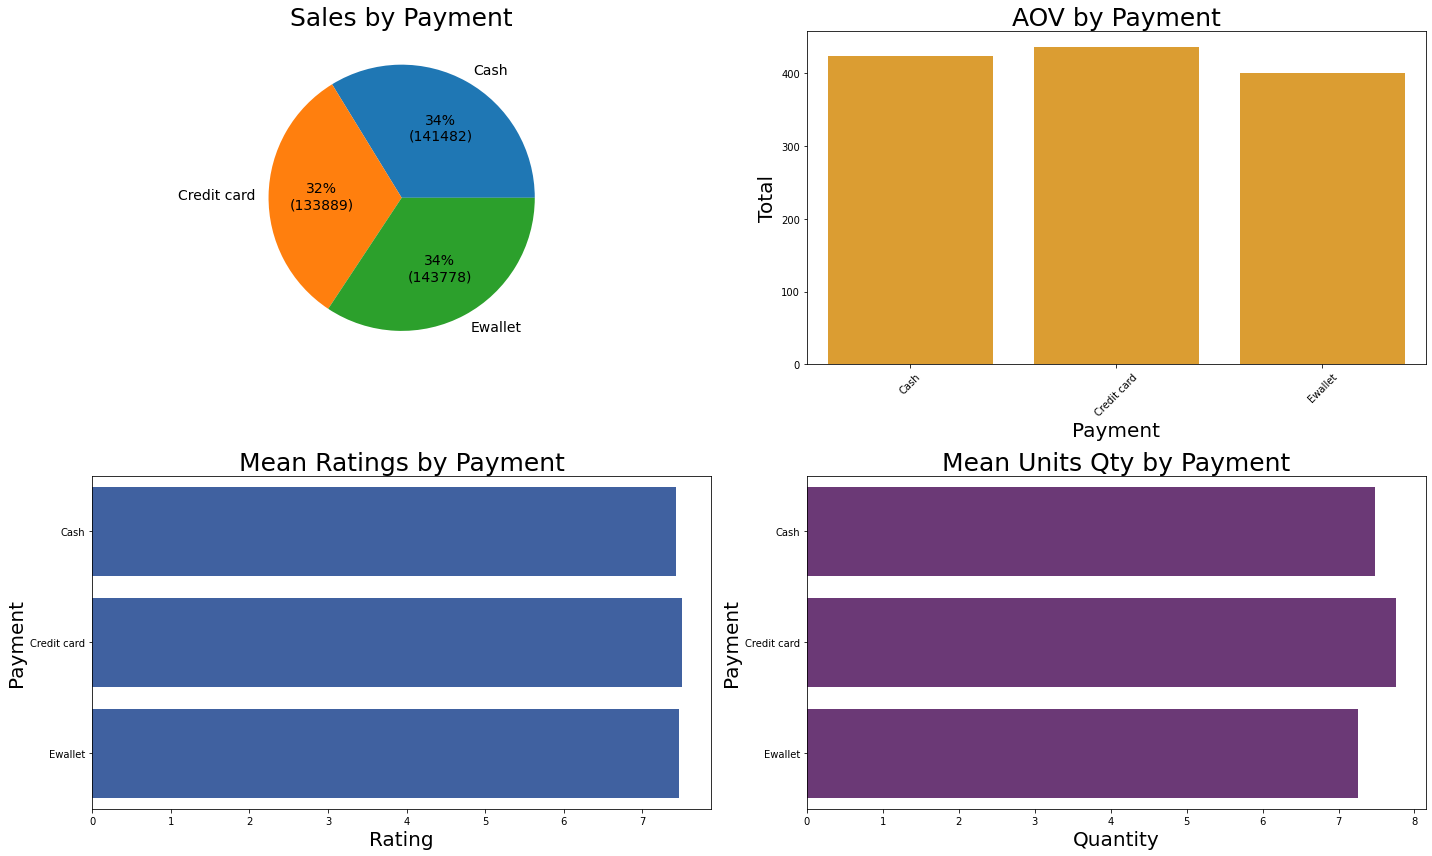

In [ ]:
grouped_analysis('Payment')

# **Time Series Analysis**

In [ ]:
# Defining function for Univariate Analysis of Quantitative Variables

def timeseries_analysis(col,hue=None):
    
    plt.figure(figsize=(20,10))
    
    sales_grouped= df1[[col,'Total']].groupby(col).sum()              # Sales grouped by col
    mean_ratings = df1[[col,'Rating']].groupby(col).mean()            # Avg ratings grouped by col
    aov  = df1[[col,'Total']].groupby(col).mean()                      # AOV by col
    mean_units_qty = df1[[col,'Quantity']].groupby(col).mean()         # Mean order qty by col


    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
     
    
    axes[0,0].set_title("Sales by " + col , size = 25)                            # Chart titl for Subplot 1
    sns.lineplot(x=sales_grouped.index , y= sales_grouped['Total'], data=sales_grouped, ax=axes[0,0])


    axes[0,1].set_title("AOV by "  + col,size = 25 )                              #  Title for Subplot 2
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), fontsize=20)    
    axes[0,1].set_xlabel( axes[0,1].get_xticklabels(),fontsize=20)
    axes[0,1].set_ylabel( axes[0,1].get_yticklabels(),fontsize=20)
    sns.barplot(x=aov.index, y='Total', color="#f7a516",data=aov,ax=axes[0,1])    
    
    
    axes[1,0].set_title("Mean Ratings by " + col,size = 25 )                      # Title for Subplot 3
    axes[1,0].set_xlabel( axes[1,0].get_xticklabels(),fontsize=20)
    axes[1,0].set_ylabel( axes[1,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_ratings.index, x='Rating', color="#305cb0",data=mean_ratings,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Mean Units Qty by " + col,size = 25 )                    # Title for Subplot 4
    axes[1,1].set_xlabel( axes[1,1].get_xticklabels(),fontsize=20)
    axes[1,1].set_ylabel( axes[1,1].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_units_qty.index, x='Quantity', color="#712f80",data=mean_units_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()
    fig.savefig("timeseries_analysis"+col+".png")

<Figure size 1440x720 with 0 Axes>

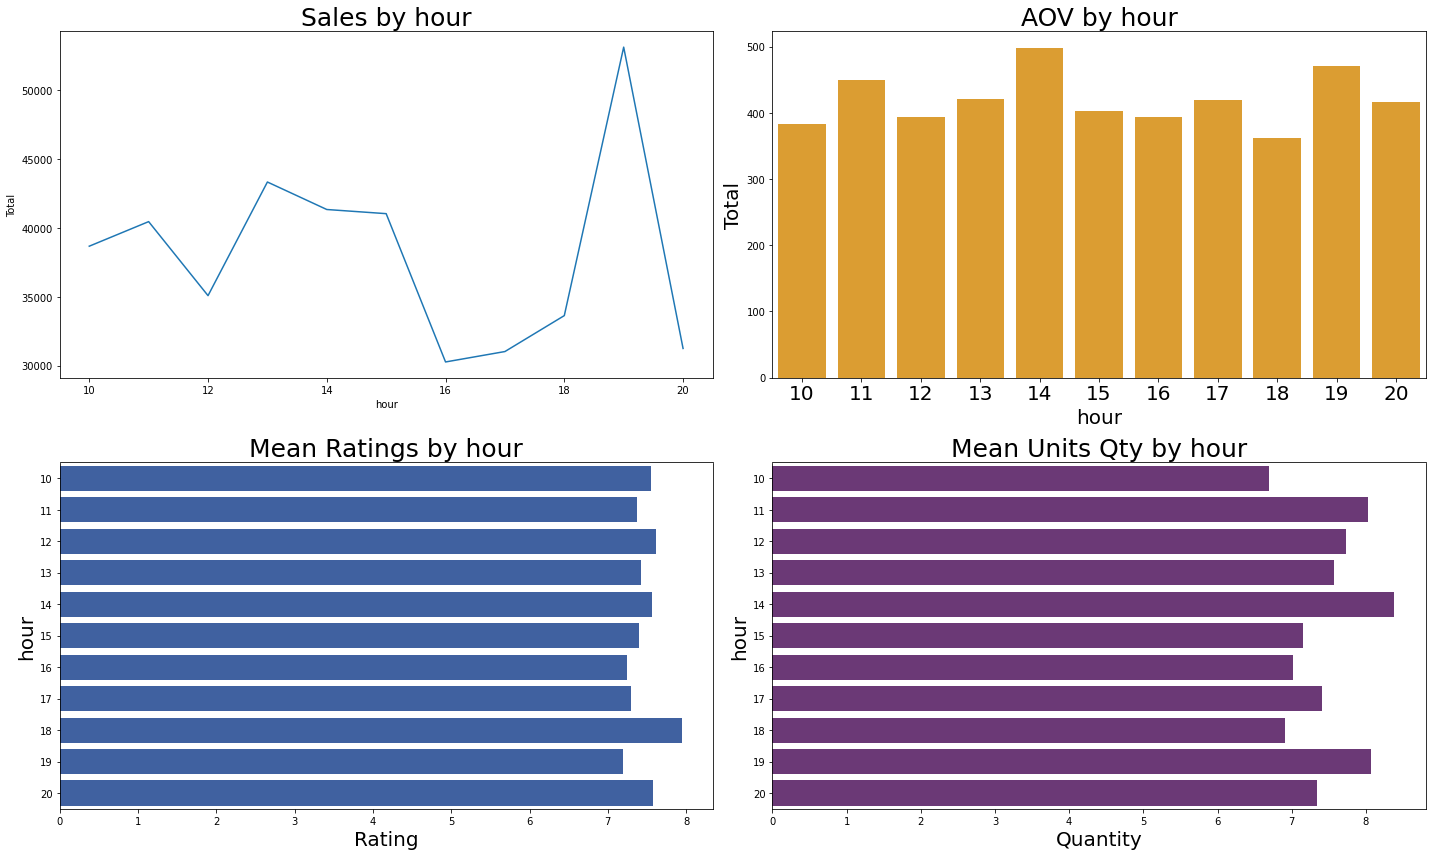

In [ ]:
timeseries_analysis('hour')

<Figure size 1440x720 with 0 Axes>

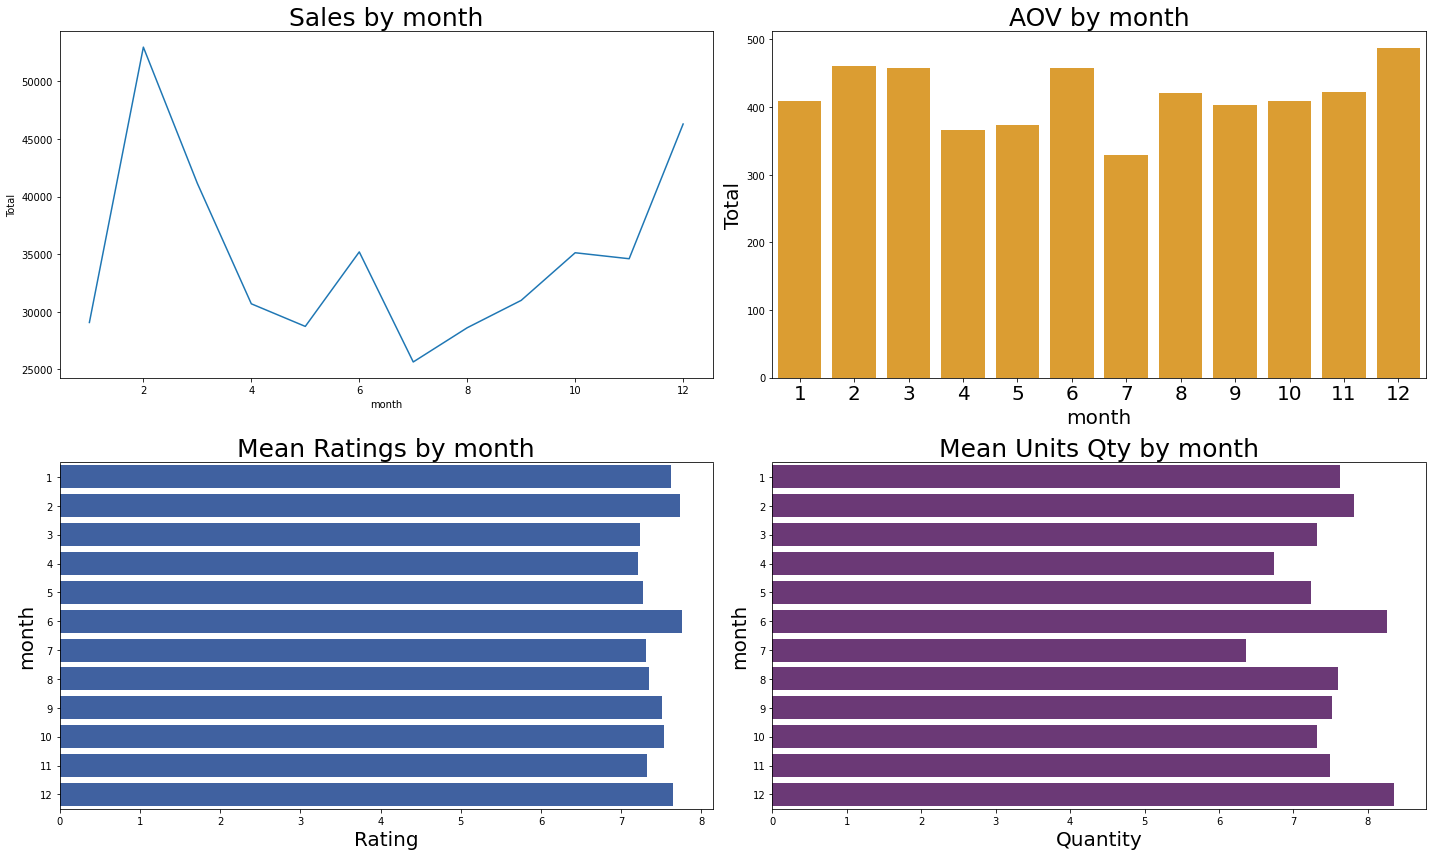

In [ ]:
timeseries_analysis('month')

Month on Month sales: Members and Non-Members

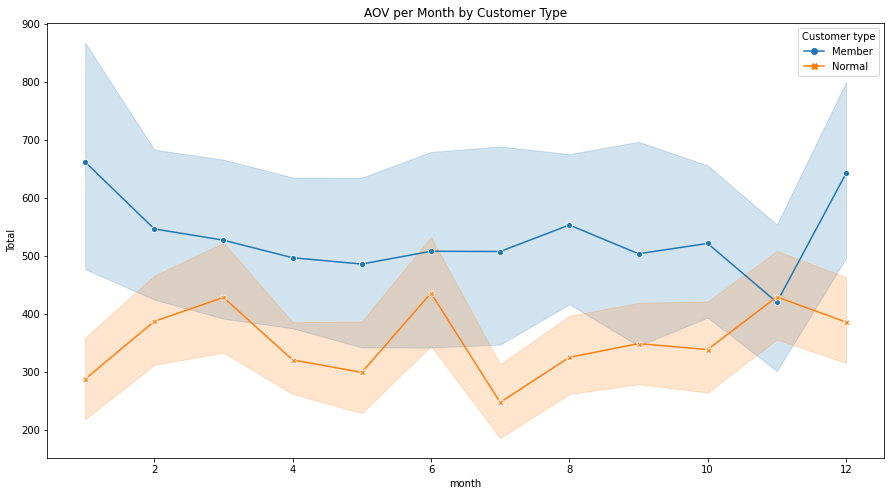

In [ ]:
plt.figure(figsize=(15,8))
plt.title('AOV per Month by Customer Type')
sns.lineplot(data=df1,x='month',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False);

Customers across city

<Figure size 1080x576 with 0 Axes>

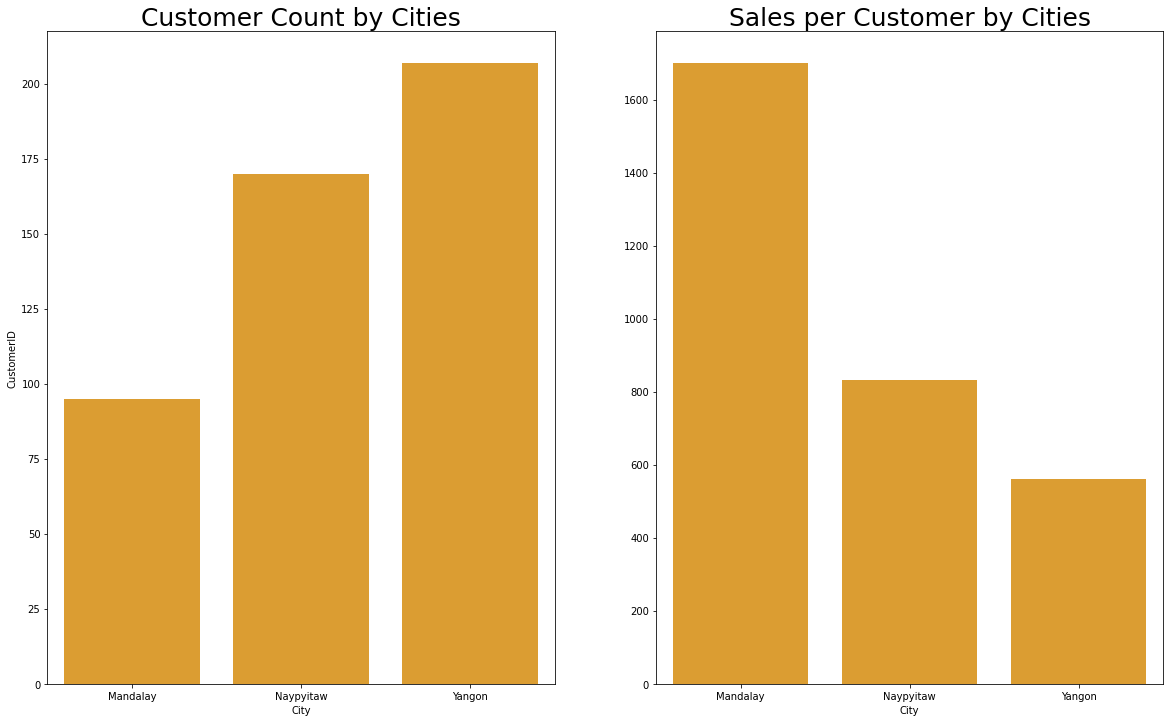

In [ ]:
plt.figure(figsize=(15,8))						
						
customer_city = df1[['City', 'CustomerID']].groupby(['City']).nunique()						
sales_city= df1[["City",'Total']].groupby("City").sum()						
sales_per_cx = sales_city["Total"]/customer_city["CustomerID"]						
						
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,12)) # Defining 4 subplots, changing fig size						
						
sns.barplot(x=customer_city.index, y='CustomerID', color="#f7a516",data=customer_city,ax=ax[0])						
_=ax[0].set_title("Customer Count by Cities", size = 25) # Chart titl for Subplot 1						
						
						
sns.barplot(x=customer_city.index, y=sales_per_cx.values, color="#f7a516",ax=ax[1])						
_=ax[1].set_title("Sales per Customer by Cities", size = 25) # Chart title for Subplot 2						
						

Function for analyzing data on 4 metrics. 

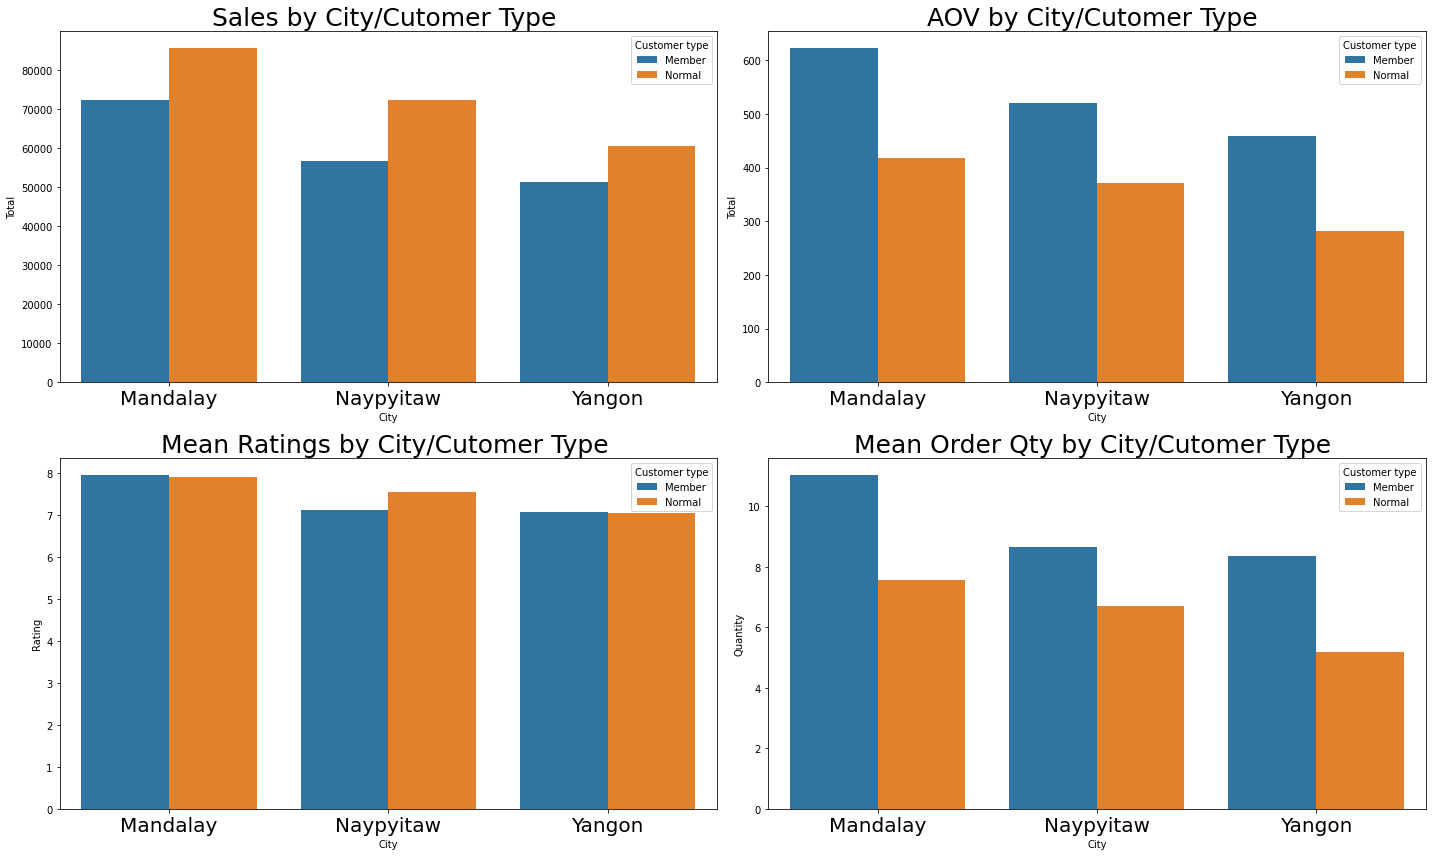

In [ ]:
sales_grouped= df1[["City","Customer type",'Total']].groupby(["City","Customer type"], as_index = False).sum()												
mean_ratings = df1[["City","Customer type",'Rating']].groupby(["City","Customer type"], as_index = False).mean()												
aov = df1[["City","Customer type",'Total']].groupby(["City","Customer type"], as_index = False).mean()												
mean_units_qty = df1[["City",'Customer type','Quantity']].groupby(["City","Customer type"], as_index = False).mean()												
fig,axes= plt.subplots(nrows =2,ncols=2,figsize=(20,12))												
_=sns.barplot(x=sales_grouped["City"], y='Total',data=sales_grouped,hue = 'Customer type', ax = axes[0,0])												
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)												
axes[0,0].set_title("Sales by City/Cutomer Type " , size = 25)												
_=sns.barplot(x=aov["City"], y='Total',data=aov,hue = 'Customer type', ax = axes[0,1])												
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), fontsize=20)												
axes[0,1].set_title("AOV by City/Cutomer Type " , size = 25)												
_=sns.barplot(x=mean_ratings["City"], y='Rating',data=mean_ratings,hue = 'Customer type', ax = axes[1,0])												
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), fontsize=20)												
axes[1,0].set_title("Mean Ratings by City/Cutomer Type " , size = 25)												
_=sns.barplot(x=mean_units_qty["City"], y='Quantity',data=mean_units_qty,hue = 'Customer type', ax = axes[1,1])												
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), fontsize=20)												
axes[1,1].set_title("Mean Order Qty by City/Cutomer Type " , size = 25)												
												
plt.tight_layout()												
												
												

## **Final Insights**

1. The Members are doing well in terms of sales numbers for the company. Thus a campaign can be formulated to promote the
member sign-ups.

2. The spike in Feb sales hints that the stores have the potential to have higher sales throughout the year. Some focused marketing can significantly improve period sales, especially from April to November,Food & Beverages, Home and lifestyle have the maximum AOV among all categories but constitute just 20% of the total sales.

3. The ratings are also better than other categories. It is a sign that a strategy can be formulated to promote these categories.
It is a good sign for the supermarket chain that Females are driving the majority of the sales. Even female-dominated categories such as Health & Beauty and Fashion are top product categories. The company can scale this further to improve overall revenue Females tend to be higher spenders than Men, and companies can take more advantage of this data insight.

4. Yangon has the least sales and AOV of all cities, and the difference is significant too. Hence a focused marketing campaign can be launched to meet the potential sale in this city.